<a href="https://colab.research.google.com/github/madnanshinwari/DeepLearning-work/blob/main/binary_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image



Use ImageDataGenerator for load and preprocess the images.this tool automatically labels the images based on the folder names and prepares them for training.

In [ ]:

train_datagen = ImageDataGenerator(rescale = 1./255, # rescale the pixel values (divide by 255) Normalize the images
                                   rotation_range = 30,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode='nearest') # Fill in newly created pixels after transformations using the nearest pixel valuescsc

## load the Training Data:


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Lab work/DL /binary classification/dataset/train',
    target_size = (128, 128), # resize all images to 128 x 128 pixels,
    batch_size = 32, # number of images process at a time
    class_mode = 'binary'

)

Found 696 images belonging to 2 classes.


## Loading and Preprocessing test data:


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255) # rescale pixel values(divide by 255) to normalize the images

## Load the test data:

In [ ]:
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Lab work/DL /binary classification/dataset/test',
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary'
)

Found 696 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense

## Define the Model:


In [ ]:
model = Sequential([
    Conv2D(32,(3,3), activation ='relu', input_shape =(128,128,3)), # 3 colors channels
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation ='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), activation ='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation ='relu'),
    Dense(1, activation ='sigmoid')  # output layer for binary classification

]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile Model:

In [ ]:
model.compile(
    optimizer = 'adam',
    loss ='binary_crossentropy', # loss function for binary classification
    metrics = ['accuracy']
)

## Train the Model:

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size, # number of batches per epoch
    epochs = 5,
    validation_data = test_generator,
    validation_steps = test_generator.samples // test_generator.batch_size # number of validation steps per epoch
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 773s 33s/step - accuracy: 0.6342 - loss: 0.6524 - val_accuracy: 0.9345 - val_loss: 0.2785
Epoch 2/5
 1/21 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8750 - loss: 0.3975

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 907ms/step - accuracy: 0.8750 - loss: 0.3975 - val_accuracy: 0.7917 - val_loss: 0.4025
Epoch 3/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 380ms/step - accuracy: 0.8834 - loss: 0.2706 - val_accuracy: 0.9315 - val_loss: 0.1660
Epoch 4/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9688 - loss: 0.0758 - val_accuracy: 0.9167 - val_loss: 0.0984
Epoch 5/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 379ms/step - accuracy: 0.9781 - loss: 0.0934 - val_accuracy: 0.9315 - val_loss: 0.2419


## Evaluate the Model:

In [ ]:
loss ,accuarcy =model.evaluate(
    test_generator,
    steps = test_generator.samples // test_generator.batch_size # Number of test steps per epoch
)
print(f"Test accuracy :{accuarcy * 100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.9219 - loss: 0.2642
Test accuracy :93.15%


## Make a predication:

In [ ]:
from tensorflow.keras.preprocessing import image

img_path ='/content/drive/MyDrive/Lab work/DL /binary classification/dataset/test/Cars/6.jpg'
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# predicat the class
prediction = model.predict(img_array)
print('Car' if prediction[0][0] < 0.5 else 'Cricket ball' )

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
Car


## Plotting  the Accuracy

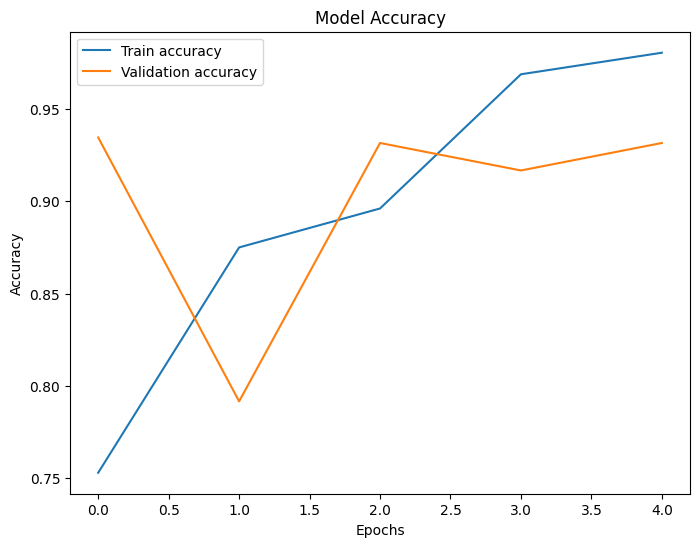

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label ='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()